# Data Preprocessing - Instacart Dataset

Author: Kelly Li

## Table of Contents:
* [1 Introduction](#one)
* [2 Data Source](#two)
* [3 Data Exploration](#three)
    * [3.1 Data Type](#threeone) 
    * [3.2 Missing Data](#threetwo)
    * [3.3 Duplicate Data](#threethree)
    * [3.4 Outliers](#threefour)
* [4 Data Transformation](#four)
    * [4.1 Feature Engineering](#fourone)
    * [4.2 Encoding Categorical Variables](#fourtwo)
* [5 Conclusion](#five)

---

## 1 Introduction <a class="anchor" id="one"></a>

Welcome to the Data Preprocessing phase of the Instacart Market Basket Analysis (MBA) project. In this Jupyter Notebook, we will delve into the intricacies of preparing and cleaning the Instacart dataset, laying the foundation for insightful analysis and modeling.

### Project Rationale
**Why Instacart?**

This project was inspired by a passion for data science and a genuine interest in the realm of consumer behavior and online grocery shopping. The Instacart dataset provides a rich and complex landscape of real-world data that presents a multitude of exciting analytical opportunities.

**Understanding Shopping Behavior**

The modern world of e-commerce has revolutionized the way consumers shop for everyday essentials. With the increasing reliance on online platforms for grocery shopping, understanding customer preferences, purchasing patterns, and product associations has become essential for both retailers and data scientists.

**Extracting Insights**

By undertaking this project, I aim to extract valuable insights from the dataset that can benefit both Instacart as a service provider and consumers looking for a more convenient shopping experience. Through data-driven analysis, we can uncover hidden patterns, identify trends, and develop data-driven strategies for optimizing the shopping journey.

**The Power of Data**

Data science is not merely about numbers and algorithms; it's about leveraging the power of data to solve real-world problems. Through this project, I hope to demonstrate how data preprocessing is the critical first step in transforming raw data into actionable insights. Clean and well-structured data empowers us to build accurate models, make informed decisions, and drive positive change.

### What to Expect
In this notebook, we will systematically address data quality issues, handle missing data, encode categorical variables, and prepare the dataset for subsequent stages of our analysis. Each step in the data preprocessing journey is a building block that contributes to the overarching goal of gaining a deeper understanding of customer behavior in the context of online grocery shopping.

Let's embark on this data-driven adventure and unlock the potential insights hidden within the Instacart dataset.

## 2 Data Source <a class="anchor" id="two"></a>

The [InstaCart Online Grocery Shopping Dataset](https://www.kaggle.com/datasets/yasserh/instacart-online-grocery-basket-analysis-dataset) is made available for non-commercial use in 2017. This anonymized dataset comprises a substantial sample, exceeding 3 million grocery orders originating from more than 200,000 Instacart users.

The dataset presents, for each user, a range of 4 to 100 of their orders, each including the comprehensive list of products acquired within the order. Alongside the product details, it includes timestamps specifying the week and hour of the day when the order was initiated. Additionally, the dataset incorporates a relative temporal measure, serving as an indicator of the elapsed time between successive orders.

### Data Dictionary <a class="anchor" id="twoone"></a>

Here's the data description in tabular format for each dataset:

**orders.csv**

| Column Name           | Description                                                                                         |
|-----------------------|-----------------------------------------------------------------------------------------------------|
| order_id              | A unique identifier for each order.                                                                |
| user_id               | Identifies the customer associated with the order.                                                  |
| eval_set*             | Indicates the evaluation set to which the order belongs (e.g., "prior" or "train").               |
| order_number          | Represents the sequence number of the order for each user.                                          |
| order_dow             | Denotes the day of the week the order was placed.                                                   |
| order_hour_of_day     | Specifies the hour of the day when the order was placed.                                            |
| days_since_prior_order| Indicates the number of days since the last order, capped at 30 (with NAs for order_number = 1).    |

*The *eval_set* column in the "orders" dataset specifies which evaluation set each order belongs to. There are 2 possible evaluation sets:

- "prior": Orders prior to that user's most recent order (~3.2 million orders).
- "train": Training data supplied (~131,000 orders).

**order_products_train.csv**

| Column Name          | Description                                                                                            |
|----------------------|--------------------------------------------------------------------------------------------------------|
| order_id             | Links to a specific order.                                                                             |
| product_id           | Identifies the product added to the cart.                                                              |
| add_to_cart_order    | Indicates the order in which each product was added to the cart.                                       |
| reordered            | Binary indicator (1 if the product has been ordered by this user in the past, 0 otherwise).          |

**products.csv**

| Column Name     | Description                                       |
|-----------------|---------------------------------------------------|
| product_id      | Uniquely identifies each product.                  |
| product_name    | Provides the name of the product.                 |
| aisle_id        | Links to the aisle in which the product is located.|
| department_id   | Associates the product with its department.       |

**order_products_prior.csv**

| Column Name          | Description                                                                                            |
|----------------------|--------------------------------------------------------------------------------------------------------|
| order_id             | Foreign key to identify the order.                                                                      |
| product_id           | Foreign key to identify the product.                                                                    |
| add_to_cart_order    | Order in which each product was added to the cart.                                                       |
| reordered            | Binary indicator (1 if the product has been ordered by this user in the past, 0 otherwise).          |

**aisles.csv**

| Column Name | Description                            |
|-------------|----------------------------------------|
| aisle_id    | Uniquely identifies each aisle.        |
| aisle       | Provides the name of the aisle.       |

**departments.csv**

| Column Name     | Description                            |
|-----------------|----------------------------------------|
| department_id   | Uniquely identifies each department.   |
| department      | Provides the name of the department.   |


## 3 Data Exploration <a class="anchor" id="three"></a>

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

c:\Users\kelly\anaconda3\envs\bigdata_ml\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
orders_df = pd.read_csv("orders.csv")
orders_df.head(5)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [3]:
main_df = pd.read_csv("order_products__prior.csv")
main_df.head(5)

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [4]:
train_df = pd.read_csv("order_products__train.csv")
train_df

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
...,...,...,...,...
1384612,3421063,14233,3,1
1384613,3421063,35548,4,1
1384614,3421070,35951,1,1
1384615,3421070,16953,2,1


In [5]:
prod_df = pd.read_csv("products.csv")
prod_df

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
...,...,...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5
49684,49685,En Croute Roast Hazelnut Cranberry,42,1
49685,49686,Artisan Baguette,112,3
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8


In [6]:
aisles_df = pd.read_csv("aisles.csv")
aisles_df

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
...,...,...
129,130,hot cereal pancake mixes
130,131,dry pasta
131,132,beauty
132,133,muscles joints pain relief


In [7]:
dep_df = pd.read_csv("departments.csv")
dep_df

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [8]:
# Shape of the data
print('The shape of the following:')
print('orders dataset:', orders_df.shape)
print('order products dataset:', main_df.shape)
print('products dataset:', prod_df.shape)
print('aisles dataset:', aisles_df.shape)
print('departments dataset:', dep_df.shape)

The shape of the following:
orders dataset: (3421083, 7)
order products dataset: (32434489, 4)
products dataset: (49688, 4)
aisles dataset: (134, 2)
departments dataset: (21, 2)


### 3.1 Data Type <a class="anchor" id="threeone"></a>

In [9]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB


In [10]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 989.8 MB


In [11]:
prod_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49688 non-null  int64 
 1   product_name   49688 non-null  object
 2   aisle_id       49688 non-null  int64 
 3   department_id  49688 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [12]:
aisles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [13]:
dep_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [14]:
# Convert 'id' columns to object data type
orders_df['order_id'] = orders_df['order_id'].astype(str)
orders_df['user_id'] = orders_df['user_id'].astype(str)

# Print updated data types of the columns
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                object 
 1   user_id                 object 
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
dtypes: float64(1), int64(3), object(3)
memory usage: 182.7+ MB


In [15]:
# Convert 'id' columns to object data type
main_df['order_id'] = main_df['order_id'].astype(str)
main_df['product_id'] = main_df['product_id'].astype(str)

# Print updated data types of the columns
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   order_id           object
 1   product_id         object
 2   add_to_cart_order  int64 
 3   reordered          int64 
dtypes: int64(2), object(2)
memory usage: 989.8+ MB


In [16]:
# Convert 'id' columns to object data type
prod_df['product_id'] = prod_df['product_id'].astype(str)
prod_df['aisle_id'] = prod_df['aisle_id'].astype(str)
prod_df['department_id'] = prod_df['department_id'].astype(str)

# Print updated data types of the columns
prod_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49688 non-null  object
 1   product_name   49688 non-null  object
 2   aisle_id       49688 non-null  object
 3   department_id  49688 non-null  object
dtypes: object(4)
memory usage: 1.5+ MB


In [17]:
# Convert 'id' columns to object data type
aisles_df['aisle_id'] = aisles_df['aisle_id'].astype(str)

# Print updated data types of the columns
aisles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    object
 1   aisle     134 non-null    object
dtypes: object(2)
memory usage: 2.2+ KB


In [18]:
# Convert 'id' columns to object data type
dep_df['department_id'] = dep_df['department_id'].astype(str)

# Print updated data types of the columns
dep_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     object
 1   department     21 non-null     object
dtypes: object(2)
memory usage: 464.0+ bytes


### 3.2 Missing Data <a class="anchor" id="threetwo"></a>

Now that we have gained a deeper understanding of the dataset, let us proceed to explore any potential missing values within it.

In [19]:
# Checking for missing values
orders_df.isna().sum()

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

In [20]:
orders_df.head(5)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [21]:
nulls = orders_df[pd.isna(orders_df['days_since_prior_order'])]
nulls.head(5)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
11,2168274,2,prior,1,2,11,NaN
26,1374495,3,prior,1,1,14,NaN
39,3343014,4,prior,1,6,11,NaN
45,2717275,5,prior,1,3,12,NaN


In [22]:
filtered = main_df[main_df['order_id'] == '2539329']
filtered

,order_id,product_id,add_to_cart_order,reordered
24076664,2539329,196,1,0
24076665,2539329,14084,2,0
24076666,2539329,12427,3,0
24076667,2539329,26088,4,0
24076668,2539329,26405,5,0


NaN values in the 'days_since_prior_order' column indicate the absence of a prior order for a particular customer within the dataset.

It signifies that there are specific conditions regarding the order's placement:
- **First Order**: The most common scenario where 'days_since_prior_order' is NaN is when a customer places their very first order. Since there is no prior order for this customer in the dataset, there are no days to measure since the last order.
- **Single-Time Shoppers**: Another scenario is when a customer places a single order and does not make any subsequent orders within the dataset's time frame. In this case, there are no "prior" orders to calculate days between, resulting in a NaN value.

In [54]:
dep_df

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [43]:
missing_dep = prod_df[prod_df['department_id'] == '21']
missing_dep

,product_id,product_name,aisle_id,department_id
37,38,Ultra Antibacterial Dish Liquid,100,21
71,72,Organic Honeycrisp Apples,100,21
109,110,Uncured Turkey Bologna,100,21
296,297,"Write Bros Ball Point Pens, Cap-Pen, Medium (1...",100,21
416,417,Classics Baby Binks Easter Chocolate Bunny,100,21
...,...,...,...,...
49552,49553,Organic Plain Skyr,100,21
49574,49575,Chocolate Vanilla Malt Custard,100,21
49640,49641,"8\"" Pecan Pie",100,21
49663,49664,Lemon Cayenne Drinking Vinegar,100,21


In [48]:
missing_aisle = prod_df[prod_df['aisle_id'] == '100']
missing_aisle 

,product_id,product_name,aisle_id,department_id
37,38,Ultra Antibacterial Dish Liquid,100,21
71,72,Organic Honeycrisp Apples,100,21
109,110,Uncured Turkey Bologna,100,21
296,297,"Write Bros Ball Point Pens, Cap-Pen, Medium (1...",100,21
416,417,Classics Baby Binks Easter Chocolate Bunny,100,21
...,...,...,...,...
49552,49553,Organic Plain Skyr,100,21
49574,49575,Chocolate Vanilla Malt Custard,100,21
49640,49641,"8\"" Pecan Pie",100,21
49663,49664,Lemon Cayenne Drinking Vinegar,100,21


In [53]:
total_missing = prod_df[(prod_df['aisle_id'] == '100') & (prod_df['department_id'] == '21')]
total_missing

,product_id,product_name,aisle_id,department_id
37,38,Ultra Antibacterial Dish Liquid,100,21
71,72,Organic Honeycrisp Apples,100,21
109,110,Uncured Turkey Bologna,100,21
296,297,"Write Bros Ball Point Pens, Cap-Pen, Medium (1...",100,21
416,417,Classics Baby Binks Easter Chocolate Bunny,100,21
...,...,...,...,...
49552,49553,Organic Plain Skyr,100,21
49574,49575,Chocolate Vanilla Malt Custard,100,21
49640,49641,"8\"" Pecan Pie",100,21
49663,49664,Lemon Cayenne Drinking Vinegar,100,21


In [49]:
missing_dep2 = dep_df[dep_df['department_id'] == '21']
missing_dep2

,department_id,department
20,21,missing


In [50]:
missing_aisle2 = aisles_df[aisles_df['aisle_id'] == '100']
missing_aisle2

,aisle_id,aisle
99,100,missing


In [52]:
print('Missing values make up', round(len(missing_dep)/prod_df.shape[0]*100, 2), "%", "of the overall data.")

Missing values make up 2.53 % of the overall data.


Given that the rows with missing values in the 'products' dataset constitute a small subset of the overall dataset, we can safely drop these rows.

In [55]:
# Drop rows with missing aisle and department
prod_df = prod_df.drop(prod_df[(prod_df['aisle_id'] == '100') & (prod_df['department_id'] == '21')].index)

In [56]:
# Sanity check
filtered_df = prod_df[(prod_df['aisle_id'] == '100') | (prod_df['department_id'] == '21')]
filtered_df

,product_id,product_name,aisle_id,department_id


We will now take a look at the 'order products' dataset to identify any missing values.

In [26]:
# Checking for missing values
main_df.isna().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

Great! It appears that there are no rows with missing values in this dataset. Now that we have addressed the missing values, let us proceed to identify any potential duplicates within the datasets.

### 3.3 Duplicate Data <a class="anchor" id="threethree"></a>

In [27]:
# Duplicated rows
print("Duplicated rows in:")
print("orders dataset:", orders_df.duplicated().sum())
print("order products dataset:", main_df.duplicated().sum())
print("products dataset:", prod_df.duplicated().sum())
print("aisles dataset:", aisles_df.duplicated().sum())
print("departments dataset:", dep_df.duplicated().sum())

Duplicated rows in:
orders dataset: 0
order products dataset: 0
products dataset: 0
aisles dataset: 0
departments dataset: 0


Woo! It appears that there are no duplicated rows within the datasets. Let us proceed to identify any potential outliers.

### 3.4 Outliers <a class="anchor" id="threefour"></a>

In this section, we will examine the datasets to identify the presence of any outliers.

In [28]:
# Summary statistics of orders dataset
orders_df.describe()

,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,3.421083e+06,3.421083e+06,3.421083e+06,3.214874e+06
mean,1.715486e+01,2.776219e+00,1.345202e+01,1.111484e+01
std,1.773316e+01,2.046829e+00,4.226088e+00,9.206737e+00
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.000000e+00,1.000000e+00,1.000000e+01,4.000000e+00
50%,1.100000e+01,3.000000e+00,1.300000e+01,7.000000e+00
75%,2.300000e+01,5.000000e+00,1.600000e+01,1.500000e+01
max,1.000000e+02,6.000000e+00,2.300000e+01,3.000000e+01


In [29]:
# Summary statistics of order products dataset
main_df.describe()

,add_to_cart_order,reordered
count,3.243449e+07,3.243449e+07
mean,8.351076e+00,5.896975e-01
std,7.126671e+00,4.918886e-01
min,1.000000e+00,0.000000e+00
25%,3.000000e+00,0.000000e+00
50%,6.000000e+00,1.000000e+00
75%,1.100000e+01,1.000000e+00
max,1.450000e+02,1.000000e+00


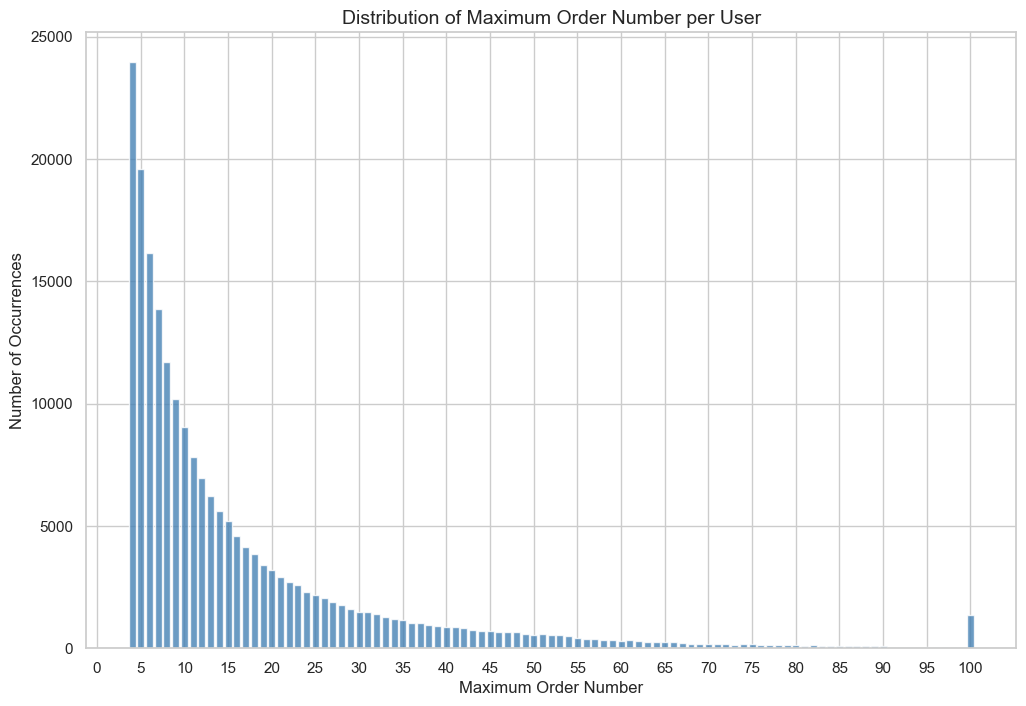

In [57]:
cnt = orders_df.groupby("user_id")["order_number"].aggregate('max').value_counts()

plt.figure(figsize=(12, 8))
plt.bar(cnt.index, cnt.values, alpha=0.8, color='steelblue')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Maximum Order Number', fontsize=12)

plt.xticks(np.arange(0, 101, 5))

plt.title('Distribution of Maximum Order Number per User', fontsize=14)
plt.show()

For each user in our dataset, we discovered a consistent pattern: a range of between 4 and 100 orders per user, each containing a sequence of purchased products. This structured dataset adheres to InstaCart's documented guidelines, ensuring that there are no orders with fewer than 4 items and a maximum cap of 100 items per order.

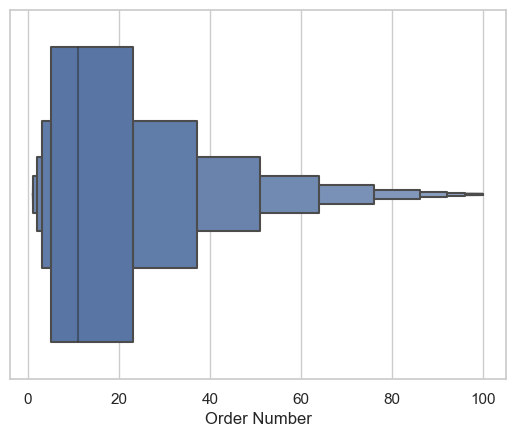

In [58]:
# Visualize boxen plot
sns.set(style = "whitegrid")
ax = sns.boxenplot(x = orders_df['order_number'])
ax.set_xlabel('Order Number')
plt.show()

### 4 Data Transformation <a class="anchor" id="four"></a>

### 4.1 Feature Engineering <a class="anchor" id="fourone"></a>

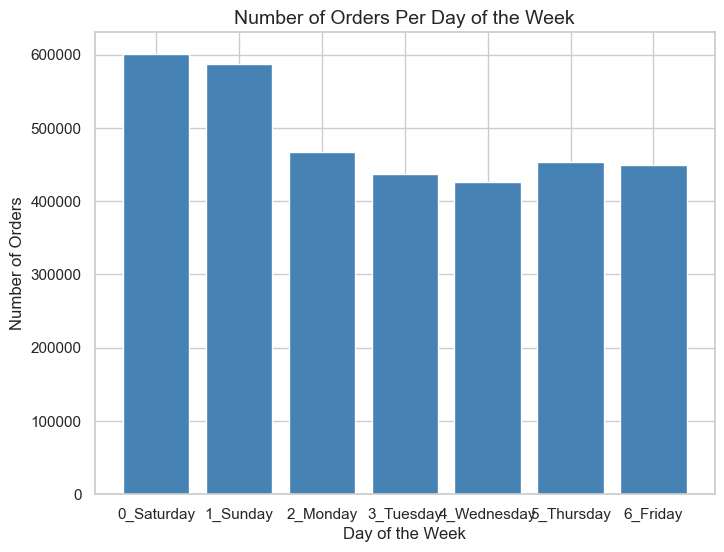

In [59]:
# Group by 'order_dow' and count the number of orders for each day of the week
reordering = orders_df['order_dow'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(reordering.index, reordering, color='steelblue')
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.title('Number of Orders Per Day of the Week', fontsize=14)
plt.show()

The analysis of the dataset reveals distinct patterns in grocery order distribution across days of the week, with notable peaks on what we assume to be Saturday and Sunday, indicative of weekend grocery shopping preferences. Days assumed to represent Monday through Friday exhibit consistent order activity, while a dip on days 3 and 4 (assuming a starting point of Monday) suggests a mid-week lull. These findings are based on our assumptions regarding day interpretation in the absence of specific day names, recognizing that different cultural and regional conventions may apply. Further investigation and context would be required to validate these patterns.

In [60]:
orders_df.groupby('order_dow')['order_id'].count()

order_dow
0_Saturday     600905
1_Sunday       587478
2_Monday       467260
3_Tuesday      436972
4_Wednesday    426339
5_Thursday     453368
6_Friday       448761
Name: order_id, dtype: int64

In [34]:
# Mapping of day of the week to names
day_names = {0: '0_Saturday', 1: '1_Sunday', 2: '2_Monday', 3: '3_Tuesday', 4: '4_Wednesday', 5: '5_Thursday', 6: '6_Friday'}

# Convert the 'order_dow' column to day names
orders_df['order_dow'] = orders_df['order_dow'].map(day_names)

In [35]:
orders_df.groupby('order_dow')['order_id'].count().sort_index()

order_dow
0_Saturday     600905
1_Sunday       587478
2_Monday       467260
3_Tuesday      436972
4_Wednesday    426339
5_Thursday     453368
6_Friday       448761
Name: order_id, dtype: int64

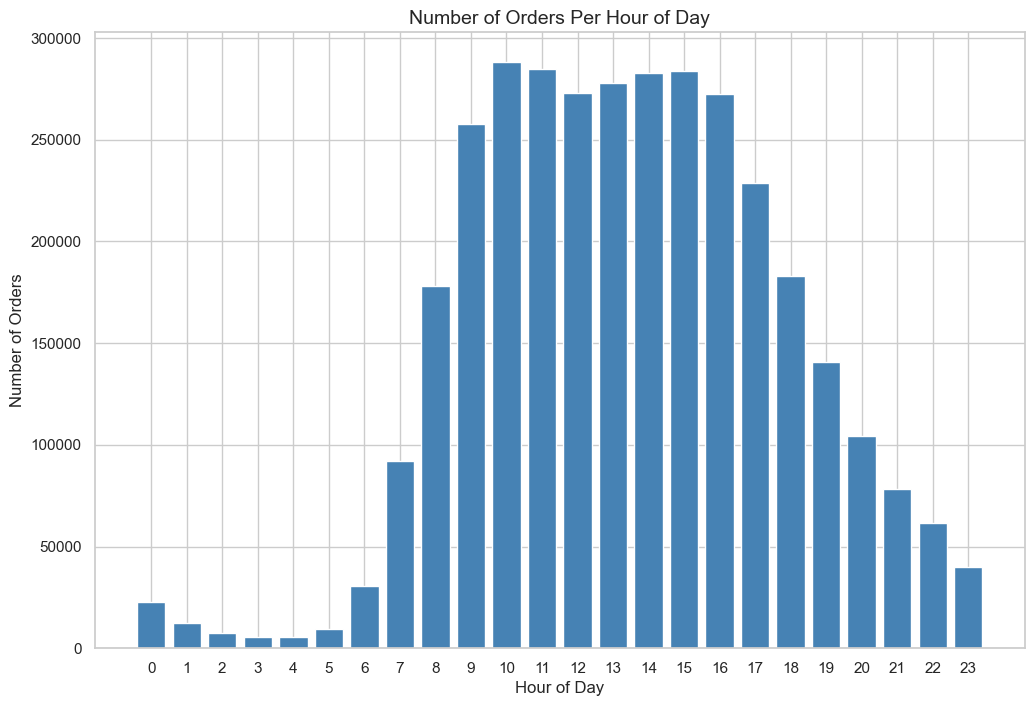

In [61]:
# Group by 'order_hour_of_day' and count the number of orders for each hour of the day
reordering = orders_df['order_hour_of_day'].value_counts()

# Create a bar plot
plt.figure(figsize=(12, 8))
plt.bar(reordering.index, reordering, color='steelblue')
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.title('Number of Orders Per Hour of Day', fontsize=14)
plt.xticks(np.arange(0, 24, 1))

plt.show()

As seen in the bar graph above, the majority of orders occur between 8:00 (8:00 AM) and 18:00 (6:00 PM), with a peak during daytime hours. This observation strongly suggests that the hour of the day has a substantial influence on order volume. The trend aligns with typical daily routines, where consumers tend to engage in grocery shopping during daytime hours while their schedules are active.

In [37]:
# Function to categorize hours into time slots
def categorize_hour(hour):
    if 0 <= hour < 6:
        return 'Late Night'
    elif 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'

# Apply the categorization to the 'order_hour_of_day' column
orders_df['order_hour_category'] = orders_df['order_hour_of_day'].apply(categorize_hour)

In [62]:
orders_df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,order_hour_category
0,2539329,1,prior,1,2_Monday,8,NaN,Morning
1,2398795,1,prior,2,3_Tuesday,7,15.0,Morning
2,473747,1,prior,3,3_Tuesday,12,21.0,Afternoon
3,2254736,1,prior,4,4_Wednesday,7,29.0,Morning
4,431534,1,prior,5,4_Wednesday,15,28.0,Afternoon


### 4.2 Encoding Categorical Variables<a class="anchor" id="fourtwo"></a>

In [39]:
count = orders_df.groupby('eval_set')['user_id'].count()
count

eval_set
prior    3214874
test       75000
train     131209
Name: user_id, dtype: int64

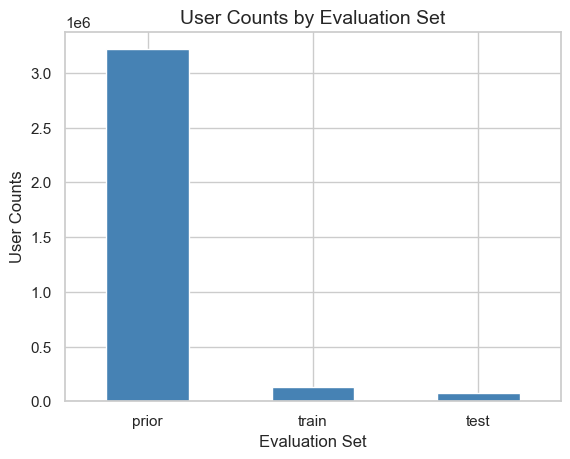

In [40]:
# Sort the Series in descending order
count_sorted = count.sort_values(ascending=False)

# Create the barplot
count_sorted.plot(kind='bar', rot=0, color='steelblue')
plt.xlabel('Evaluation Set')
plt.ylabel('User Counts')
plt.title('User Counts by Evaluation Set', fontsize=14)
plt.show()

In [41]:
unique_count = orders_df.groupby('eval_set')['user_id'].nunique()
unique_count

eval_set
prior    206209
test      75000
train    131209
Name: user_id, dtype: int64

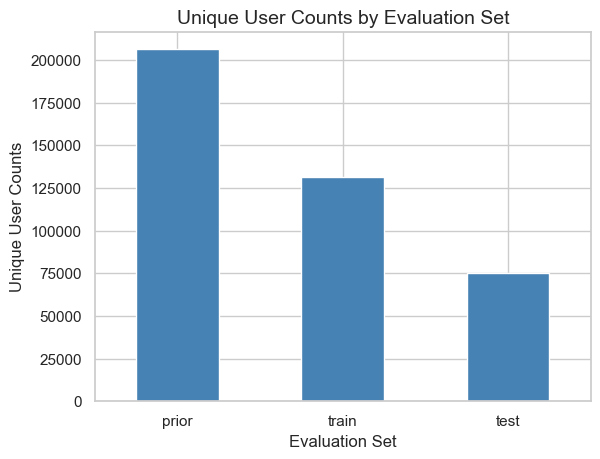

In [42]:
# Sort the Series in descending order
unique_count_sorted = unique_count.sort_values(ascending=False)

# Create the barplot
unique_count_sorted.plot(kind='bar', rot=0, color='steelblue')
plt.xlabel('Evaluation Set')
plt.ylabel('Unique User Counts')
plt.title('Unique User Counts by Evaluation Set', fontsize=14)
plt.show()

In the dataset, there is a total of 206,209 unique customers. Among these, 131,209 customers' most recent purchases have been designated as the 'train' set. The objective is to use this training data to develop predictive models. Subsequently, the remaining 75,000 customers are the focus of prediction, where we aim to forecast their future purchasing behavior based on their prior shopping patterns.

### 5 Conclusion<a class="anchor" id="five"></a>